In [1]:
# 导入扩展库
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

In [2]:
# 读取文件
fn = open('detail.txt',encoding='utf8') # 打开文件
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

In [3]:
# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

In [4]:
# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = [u'学习',u'具有', u'基于', u'以上', u'实现',
                u'具备',u'1',u'2',u'3',u'4',u'5',
                u'6',u'7',u'8',u'9',u'、',u'，',
                u'的',u' ',u'；',u'和',u'：',u'等',
                u'/',u'。',u'有',u'\xa0'] # 自定义去除词库

In [5]:
for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lhang\AppData\Local\Temp\jieba.cache
Loading model cost 0.932 seconds.
Prefix dict has been built succesfully.


In [6]:
# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(10) # 获取前10最高频的词
print (word_counts_top10) # 输出检查

[('算法', 202), ('深度', 197), ('相关', 151), ('能力', 117), ('熟悉', 115), ('经验', 114), ('负责', 112), ('机器', 102), ('工作', 94), ('及', 91)]


In [7]:
# 词频展示
mask = np.array(Image.open('world.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    background_color = 'white',  # 设置背景颜色
    font_path=r'.\simkai.ttf', # 设置字体格式
    mask=mask, # 设置背景图
    stopwords = wordcloud.STOPWORDS,  # 设置停用词
    color_func=None,    #设置关键字的字体颜色
    random_state = 20,   # 设置有多少种随机生成状态，即有多少种配色方案
    max_words=1000, # 最多显示词数
    max_font_size=200 # 字体最大值
)

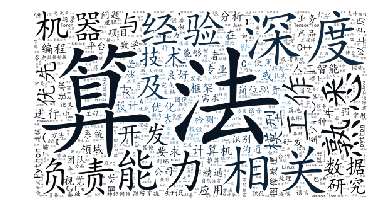

In [9]:
wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像